# load in detrended LCs

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
def determine_cadence(times):
    time_gaps = {}
    for ii in range(1, len(times)):
        time_gap = np.round(times[ii]-times[ii-1], 4)
        if time_gap in time_gaps.keys():
            time_gaps[time_gap] += 1
        else:
            time_gaps[time_gap] = 1
            
    #find the key that corresponds to the most data gaps, this is the cadence
    cadence = max(time_gaps, key=time_gaps.get)
    return cadence
            
        

In [20]:
import matplotlib 
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 

# load in the t0s
trans_inds = [0,1,3,4,5,6,7,8,29,31]
t0 = 277.504085
period = 160.88414
duration = 10.7536
depth = 0.006 #approx



t0s = []
for epoch in trans_inds:
    t0s.append(t0 + period*epoch)
    
t0s = np.array(t0s)    

print(t0s)

[ 277.504085  438.388225  760.156505  921.040645 1081.924785 1242.808925
 1403.693065 1564.577205 4943.144145 5264.912425]


In [21]:
Kepler = pd.read_csv('mm_kipping_kepler.dat', delimiter='\t', header=None, names=['time', 'flux', 'flux_err'])

TESS = pd.read_csv('mm_kipping_tess.dat', delimiter=' ', header=None, names=['time', 'flux', 'flux_err'])
#BARON = pd.read_csv('mm_kipping_baron.dat', delimiter='\t', header=None, names=['time', 'flux', 'flux_err'])
BARO = pd.read_csv(
    'Kepler1513_BARO_20220715_no-detrending.csv', 
    delimiter=',', skiprows=1, names=['time', 'flux', 'flux_err', 'airmass'])
BARON = pd.read_csv(
    'Kepler1513_BARON_20220715_no-detrending.csv', 
    delimiter=',', skiprows=1, names=['time', 'flux', 'flux_err', 'airmass'])



LCO = pd.read_csv(
    'June2obs/TIC394177315-11_20230602_LCO-Teid-1m0_ip_5px_KC_bjd-flux-err-fwhm-sky-detrended.dat', 
    delimiter='\t', skiprows=1, names=['time', 'flux', 'flux_err'])
Whitin = pd.read_csv(
    'June2obs/TIC394177315-11_UT20230602_Whitin_R.ap7_datasubset.dat',
    delimiter='\t', skiprows=1, names=['time','flux','flux_err','airmass'])



BARON['time'] -= 2454833
BARO['time'] -= 2454833
TESS['time']+= 2400000-2454833

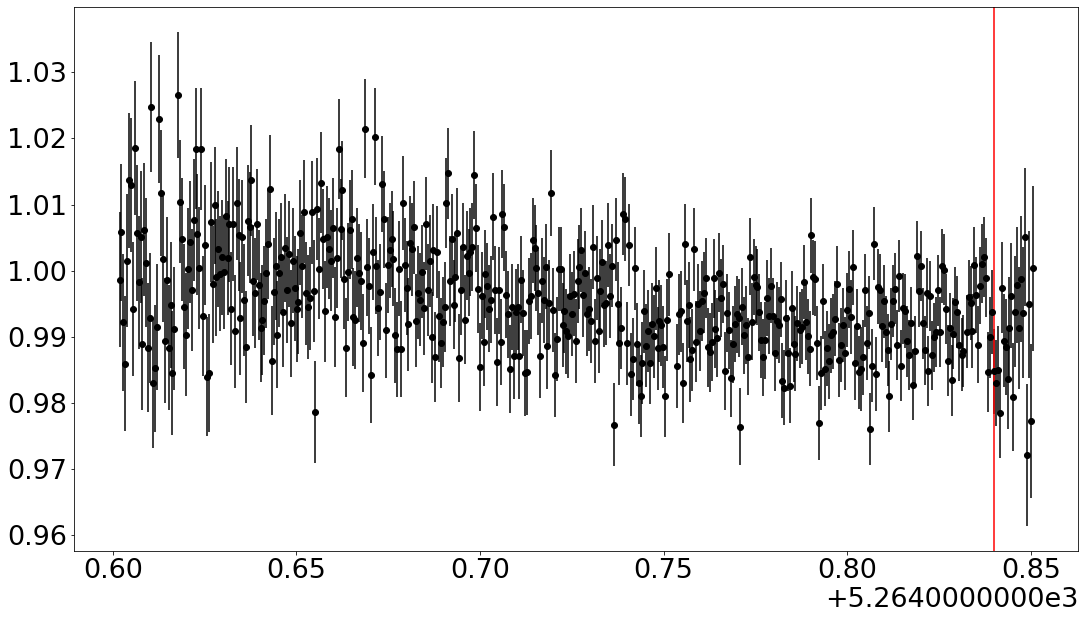

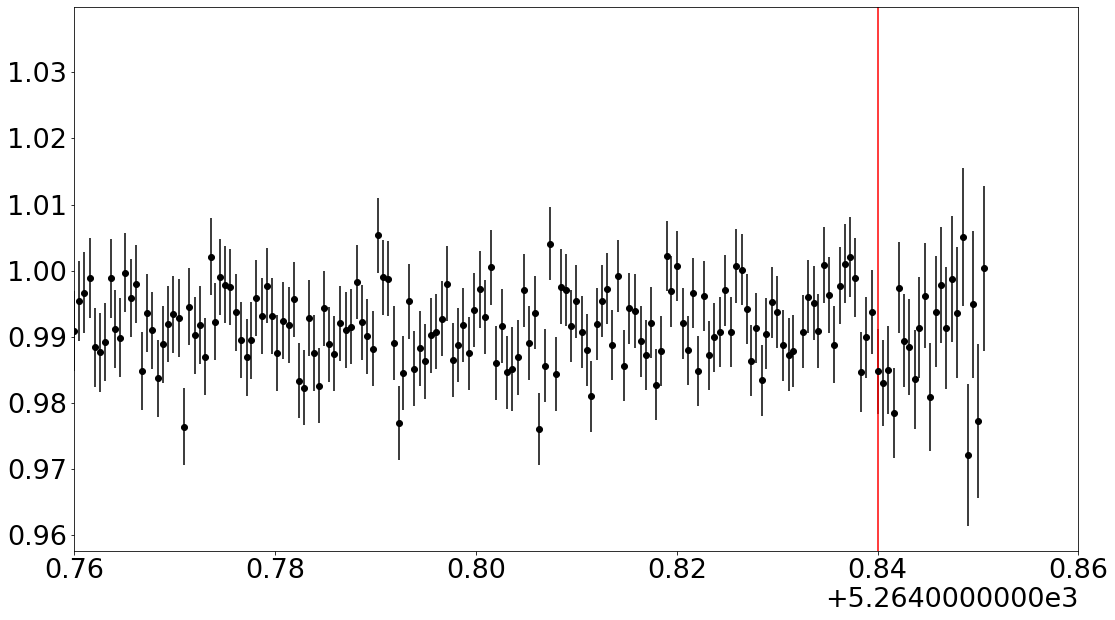

In [22]:
#From Kim McLeod at Whitin: 
#For the final fit, it might be worth cutting out the data at the end where the 
#positions begin to shift due to the rotator hitting its limit, 
#and then at the very end twilight appears in the sky counts.

plt.figure(figsize=[18,10])
plt.errorbar(Whitin['time']-2454833, Whitin['flux'], yerr=Whitin['flux_err'], marker='o', color='k', ls='')
plt.axvline(5264.84, 0, 1, color='r')

plt.figure(figsize=[18,10])
plt.errorbar(Whitin['time']-2454833, Whitin['flux'], yerr=Whitin['flux_err'], marker='o', color='k', ls='')
plt.axvline(5264.84, 0, 1, color='r')
plt.xlim(5264.76, 5264.86)

#cutoff Whitin data after 2460097.84
#df.drop(df[df.score < 50].index, inplace=True)

Whitin_cut = Whitin.drop(Whitin[Whitin['time']>2460097.84].index)



In [23]:
from scipy.optimize import curve_fit

def line(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

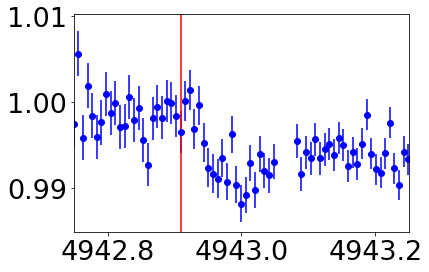

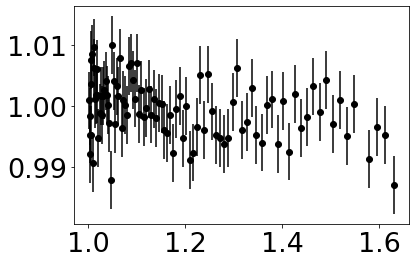

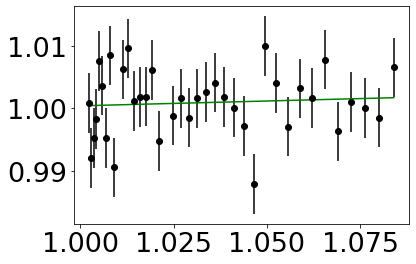

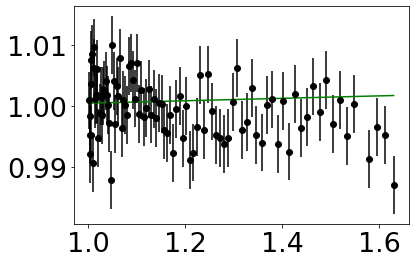

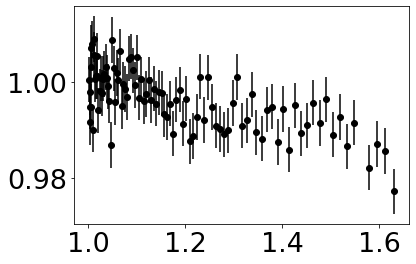

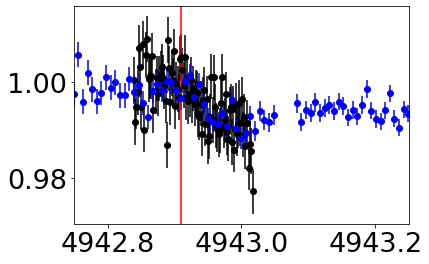

In [24]:
plt.errorbar(TESS['time'], TESS['flux'], TESS['flux_err'], color='b', ls='', marker='o')
#plt.errorbar(BARON['time'], BARON['flux'], BARON['flux_err'], color='k', ls='', marker='o')


ingress = 4942.91
plt.axvline(ingress, color='r')

plt.xlim(4942.75, 4943.25)

plt.show()



BARON_pre_ingress = BARON.loc[BARON['time'] < ingress]


plt.errorbar(BARON['airmass'], BARON['flux'], BARON['flux_err'], color='k', ls='', marker='o')
plt.show()



baron_line,_ = curve_fit(line, BARON_pre_ingress['airmass'], BARON_pre_ingress['flux'], sigma=BARON_pre_ingress['flux_err']) 


x_plot = np.linspace(np.min(BARON['airmass']), np.max(BARON['airmass']), 100)
x_plot_pre_ingress = np.linspace(np.min(BARON_pre_ingress['airmass']), np.max(BARON_pre_ingress['airmass']), 100)

line_plot = line(x_plot, baron_line[0], baron_line[1])
line_plot = line(x_plot_pre_ingress, baron_line[0], baron_line[1])

line_fit = line(BARON['airmass'], baron_line[0], baron_line[1])


plt.errorbar(BARON_pre_ingress['airmass'], BARON_pre_ingress['flux'], BARON_pre_ingress['flux_err'], color='k', ls='', marker='o')
plt.plot(x_plot_pre_ingress, line_plot, 'g')


plt.show()

plt.errorbar(BARON['airmass'], BARON['flux'], BARON['flux_err'], color='k', ls='', marker='o')
plt.plot(x_plot, line_plot, 'g')


plt.show()
plt.figure()
baron_flux_detrended_airmass = BARON['flux']/line_fit
plt.errorbar(BARON['airmass'], baron_flux_detrended_airmass, BARON['flux_err'], color='k', ls='', marker='o')



plt.show()



plt.errorbar(BARON['time'], baron_flux_detrended_airmass, yerr=BARON['flux_err'], marker='o', color='k', ls='')

plt.errorbar(TESS['time'], TESS['flux'], yerr=TESS['flux_err'], color='b', ls='', marker='o')

plt.axvline(ingress, color='r')

plt.xlim(4942.75, 4943.25)
plt.show()





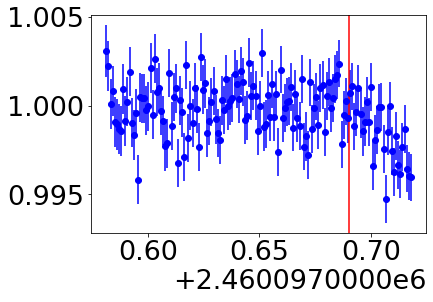

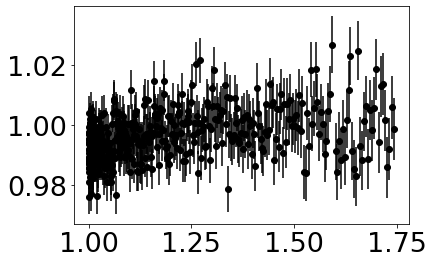

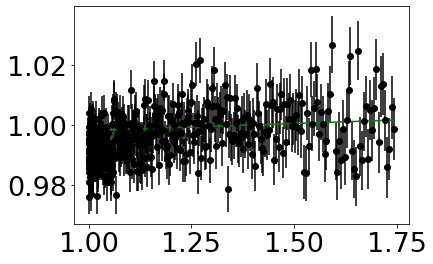

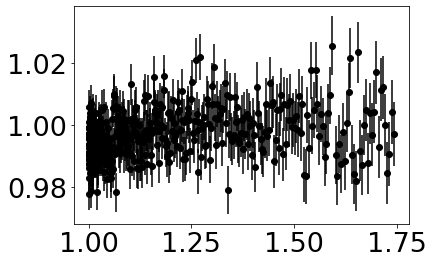

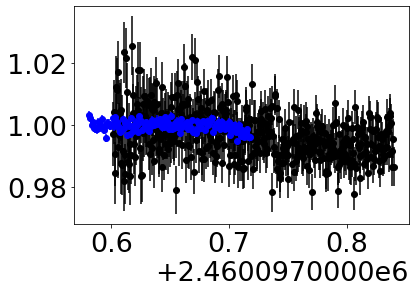

In [25]:
plt.errorbar(LCO['time'], LCO['flux'], yerr=LCO['flux_err'], color='b', ls='', marker='o')
plt.axvline(2460097.69, 0, 1, color='r')
plt.show()

plt.errorbar(Whitin_cut['airmass'], Whitin_cut['flux'], Whitin_cut['flux_err'], color='k', ls='', marker='o')
plt.show()

whitin_pre_ingress = Whitin_cut.loc[Whitin_cut['time'] < 2460097.69]

whitin_line,_ = curve_fit(line, whitin_pre_ingress['airmass'], whitin_pre_ingress['flux'], sigma=whitin_pre_ingress['flux_err']) 


x_plot = np.linspace(np.min(Whitin_cut['airmass']), np.max(Whitin_cut['airmass']), 100)

line_plot = line(x_plot, whitin_line[0], whitin_line[1])

line_fit = line(Whitin_cut['airmass'], whitin_line[0], whitin_line[1])


plt.errorbar(Whitin_cut['airmass'], Whitin_cut['flux'], Whitin_cut['flux_err'], color='k', ls='', marker='o')
plt.plot(x_plot, line_plot, 'g')


plt.show()

plt.figure()
whitin_flux_detrended_airmass = Whitin_cut['flux']/line_fit
plt.errorbar(Whitin_cut['airmass'], whitin_flux_detrended_airmass, Whitin_cut['flux_err'], color='k', ls='', marker='o')



plt.show()


plt.errorbar(Whitin_cut['time'], whitin_flux_detrended_airmass, yerr=Whitin_cut['flux_err'], marker='o', color='k', ls='')

plt.errorbar(LCO['time'], LCO['flux'], yerr=LCO['flux_err'], color='b', ls='', marker='o')


#plt.xlim(5262, 5264.91676768)
plt.show()





In [26]:
x_kepler, y_kepler, yerr_kepler = Kepler['time'].values+2400000-2454833, Kepler['flux'].values-1, Kepler['flux_err'].values

x_tess, y_tess, yerr_tess = TESS['time'].values, TESS['flux'].values-1, TESS['flux_err'].values
#x_baron, y_baron, yerr_baron = BARON['time'].values, BARON['flux'].values-1, BARON['flux_err'].values
x_baron, y_baron, yerr_baron = BARON['time'].values, baron_flux_detrended_airmass.values-1, BARON['flux_err'].values

x_lco, y_lco, yerr_lco = LCO['time'].values - 2454833., LCO['flux'].values-1, LCO['flux_err'].values
x_whitin, y_whitin, yerr_whitin = Whitin_cut['time'].values - 2454833., whitin_flux_detrended_airmass.values-1, Whitin_cut['flux_err'].values



In [27]:
from collections import OrderedDict

texp_kepler = determine_cadence(x_kepler)

texp_baron = determine_cadence(x_baron)
texp_tess = determine_cadence(x_tess)

texp_lco = determine_cadence(x_lco)
texp_whitin = determine_cadence(x_whitin)


datasets = OrderedDict(
    [
        ("Kepler", [x_kepler, y_kepler, yerr_kepler, texp_kepler]),
        ("BARON", [x_baron, y_baron, yerr_baron, texp_baron]),
        ("TESS", [x_tess, y_tess, yerr_tess, texp_tess]),
        ("LCOGT", [x_lco, y_lco, yerr_lco, texp_lco]),
        ("Whitin", [x_whitin, y_whitin, yerr_whitin, texp_whitin])
    ]
)

print(t0s[0])
datasets

277.504085


OrderedDict([('Kepler',
              [array([ 274.79345151,  274.8138842 ,  274.8343168 , ..., 1567.2566749 ,
                      1567.27710926, 1567.29754371]),
               array([ 1.34591573e-04, -6.52068323e-05,  3.17914200e-05, ...,
                       8.26584553e-05, -6.51615510e-05, -2.65159057e-05]),
               array([9.84939350e-05, 9.82610940e-05, 9.80573755e-05, ...,
                      9.88612586e-05, 9.84045546e-05, 1.00742059e-04]),
               0.0204]),
             ('BARON',
              [array([4942.83959444, 4942.84140001, 4942.84321716, 4942.84502272,
                      4942.84681671, 4942.84862229, 4942.85042785, 4942.852245  ,
                      4942.85405057, 4942.85767328, 4942.85946728, 4942.86127285,
                      4942.86307842, 4942.86488398, 4942.86667798, 4942.86848355,
                      4942.87210626, 4942.87391183, 4942.87571741, 4942.8775114 ,
                      4942.87931697, 4942.88112254, 4942.8829281 , 4942.88474

In [28]:
for n, (name, (x, y, yerr, texp)) in enumerate(datasets.items()):
    df = pd.DataFrame(
        {'x': x,
         'y': y+1,
         'yerr': yerr
        })
    
    df.to_csv('./detrended_lcs/' + name + '.dat', index=False, header=False, sep='\t')

In [29]:
t0s

array([ 277.504085,  438.388225,  760.156505,  921.040645, 1081.924785,
       1242.808925, 1403.693065, 1564.577205, 4943.144145, 5264.912425])

In [30]:
#find reasonable limb darkening params for ground based obs
#𝑇eff = 5491 ± 100 [K]
#logg = 4.46 ± 0.10 [cgs]
#[Fe/H] = 0.17 ± 0.06

limb_darkening = pd.read_csv('claret_limb_darkening.tsv', delimiter='\t', skiprows=39)


#limit by logg
limb_darkening = limb_darkening.loc[limb_darkening['logg [cm/s2]'] > 4.46-.1]
limb_darkening = limb_darkening.loc[limb_darkening['logg [cm/s2]'] < 4.46+.1]

#limit by Teff
limb_darkening = limb_darkening.loc[limb_darkening['Teff [K]'] > 5491-100]
limb_darkening = limb_darkening.loc[limb_darkening['Teff [K]'] < 5491+100]
limb_darkening

#limit by fe/h
limb_darkening = limb_darkening.loc[limb_darkening['Z [Sun]'] > 0.17-0.06]
limb_darkening = limb_darkening.loc[limb_darkening['Z [Sun]'] < 0.17+0.06]
limb_darkening

#BARON observed in R band
BARON_limb_darkening = limb_darkening.loc[limb_darkening['Filt'] == 'i*']
BARON_u1 = float(BARON_limb_darkening['a'].values)
BARON_u2 = float(BARON_limb_darkening['b'].values)
print('BARON')
print(BARON_u1, BARON_u2)
print('')

#LCO observed in ip band
LCO_limb_darkening = limb_darkening.loc[limb_darkening['Filt'] == 'i*']
LCO_u1 = float(LCO_limb_darkening['a'].values)
LCO_u2 = float(LCO_limb_darkening['b'].values)
print('LCO')
print(LCO_u1, LCO_u2)
print('')

#Whitin observed in R band
Whitin_limb_darkening = limb_darkening.loc[limb_darkening['Filt'] == 'R ']
Whitin_u1 = float(Whitin_limb_darkening['a'].values)
Whitin_u2 = float(Whitin_limb_darkening['b'].values)
print('Whitin')
print(Whitin_u1, Whitin_u2)
print('')


BARON
0.381 0.2272

LCO
0.381 0.2272

Whitin
0.4498 0.2232



# load in posterior

In [31]:
import arviz as az
import numpy as np

posterior = az.from_netcdf('./transit_model_final_posterior.out')


rho_star_median = np.median(posterior.posterior['rho_star'].values)
ror_median = np.median(posterior.posterior['ror'].values)
b_median = np.median(posterior.posterior['b'].values)
tts_median = []
for ii in range(0, len(trans_inds)):
    tts_median.append(np.median(posterior.posterior['tts_0'].values.T[ii]))

Kepler_q1_median = np.median(posterior.posterior['Kepler_q1'].values)
Kepler_q2_median = np.median(posterior.posterior['Kepler_q2'].values)
TESS_q1_median = np.median(posterior.posterior['TESS_q1'].values)
TESS_q2_median = np.median(posterior.posterior['TESS_q2'].values)

TESS_blend_median = np.median(posterior.posterior['TESS_blend'].values)

period_median = np.median(posterior.posterior['period'].values)


trans_inds_med = np.array([0,1,3,4,5,6,7,8,29,31])


In [32]:
rho_star_median

1.3044790297691868

In [33]:
import pymc3 as pm
import pymc3_ext as pmx
import exoplanet as xo
import aesara_theano_fallback.tensor as tt
from functools import partial
from celerite2.theano import terms, GaussianProcess
import theano




# Find a reference transit time near the middle of the observations to avoid
# strong covariances between period and t0
x_min = min(np.min(x) for x, _, _, _ in datasets.values())
x_max = max(np.max(x) for x, _, _, _ in datasets.values())
x_mid = 0.5 * (x_min + x_max)

mid_epoch = np.round((x_mid) / period)
t0_ref = period * np.round((x_mid - t0s[0]) / period)


with pm.Model() as model:

    # Shared orbital parameters --> impact parameter, transit times, stellar density
    ###########################
    ###########################
    ###########################
    #stellar density
    #log_rho_star = pm.Uniform('log_rho_star', lower=-3, upper=3)
    #rho_star = pm.Deterministic('rho_star', tt.exp(log_rho_star))
    rho_star = pm.Deterministic("rho_star", tt.constant(rho_star_median))
    
    # impact parameter
    #b = pm.Uniform("b", lower=0, upper=2)
    b = pm.Deterministic("b", tt.constant(b_median))
    
    # Now we have a parameter for each transit time for each planet:
    #transit_times = []
    #for i in range(1):
    #    transit_times.append(
    #        pm.Uniform(
    #            "tts_{0}".format(i),
    #            lower=t0s-1,
    #            upper=t0s+1,
    #            shape=len(t0s),
    #        )
    #    )
    
    transit_times = pm.Deterministic("tts_0", tt.constant(tts_median))

        
    # Now we have a parameter for each transit time for each planet:
    #transit_inds = pm.Deterministic("transit_inds", tt.constant(trans_inds))
    transit_inds = pm.Deterministic("transit_inds", tt.constant(trans_inds_med))
    
    
    
    
    
    # Set up an orbit for the planet
    orbit = xo.orbits.TTVOrbit(b=b, transit_times=[transit_times], 
                               rho_star=rho_star, transit_inds=[transit_inds])
    
    
    #rp_over_rstar 
    #ror = pm.Uniform('ror', lower=0, upper=1)
    ror = pm.Deterministic("ror", tt.constant(ror_median))
    
    #fix r_star = 1, then can solve for rp/rstar after
    r_star = 1.
    r_pl = pm.Deterministic("r_pl", ror * r_star)
    
    
    # It will be useful later to track some parameters of the orbit
    pm.Deterministic("t0", orbit.t0)
    pm.Deterministic("period", orbit.period)
    pm.Deterministic("ttvs_{0}".format(0), orbit.ttvs[0])
    
    




    # not shared parameters --> depth and limb-darkening
    # Loop over the instruments
    parameters = dict()
    lc_models = dict()
    for n, (name, (x, y, yerr, texp)) in enumerate(datasets.items()):
        # We define the per-instrument parameters in a submodel so that we
        # don't have to prefix the names manually
        with pm.Model(name=name, model=model):
            
            #if groundbased, assume a claret limb-darkening
            if name == 'BARON':
                u1, u2 = BARON_u1, BARON_u2
            elif name == 'LCOGT':
                u1, u2 = LCO_u1, LCO_u2
            elif name == 'Whitin':
                u1, u2 = Whitin_u1, Whitin_u2
            
            # Else, use the limb darkening from equations 15-19 in Kipping 2013
            # https://arxiv.org/pdf/1308.0009.pdf
            else:
                #q1 = pm.Uniform('q1', lower=0., upper=1.)
                #q2 = pm.Uniform('q2', lower=0., upper=1.)
                if name == 'Kepler':
                    q1 = pm.Deterministic("q1", tt.constant(Kepler_q1_median))
                    q2 = pm.Deterministic("q2", tt.constant(Kepler_q2_median))
                
                elif name == 'TESS':
                    q1 = pm.Deterministic("q1", tt.constant(TESS_q1_median))
                    q2 = pm.Deterministic("q2", tt.constant(TESS_q2_median))
            
            
                u1 = pm.Deterministic('u1', 2*tt.sqrt(q1)*q2)
                u2 = pm.Deterministic('u2', tt.sqrt(q1)*(1-(2*q2)))

            star = xo.LimbDarkLightCurve(u1=u1, u2=u2)
            

            
                
                
            #add TESS blend facotr
            if name == 'TESS':
                #log_blend = pm.Uniform('log_blend', lower=tt.log(1), upper=tt.log(10), testval=tt.log(1.01))
                #blend = pm.Deterministic('blend', tt.exp(log_blend))
                blend = pm.Deterministic("blend", tt.constant(TESS_blend_median))
                y = (y+1)/blend - 1
            
    

            # Keep track of the parameters for optimization
            if name == 'TESS':
                parameters[name] = [q1, q2, r_pl, blend]
            elif name == 'Kepler':
                parameters[name] = [q1, q2, r_pl]
            else:
                parameters[name] = [r_pl]
            

        # The light curve model
        def lc_model(star, r_pl, texp, t):
            return pm.math.sum(
                star.get_light_curve(orbit=orbit, r=r_pl*r_star, t=t, texp=texp),
                axis=-1,
            )

        lc_model_partial = partial(lc_model, star, r_pl, texp)
        lc_models[name] = lc_model_partial
        
        lc_model_obs = lc_model(star, r_pl, texp, x)
        pm.Normal(f"{name}_obs", mu=lc_model_obs, sd=np.sqrt(yerr**2.), observed=y)



    # Optimize the model
    map_soln = model.test_point

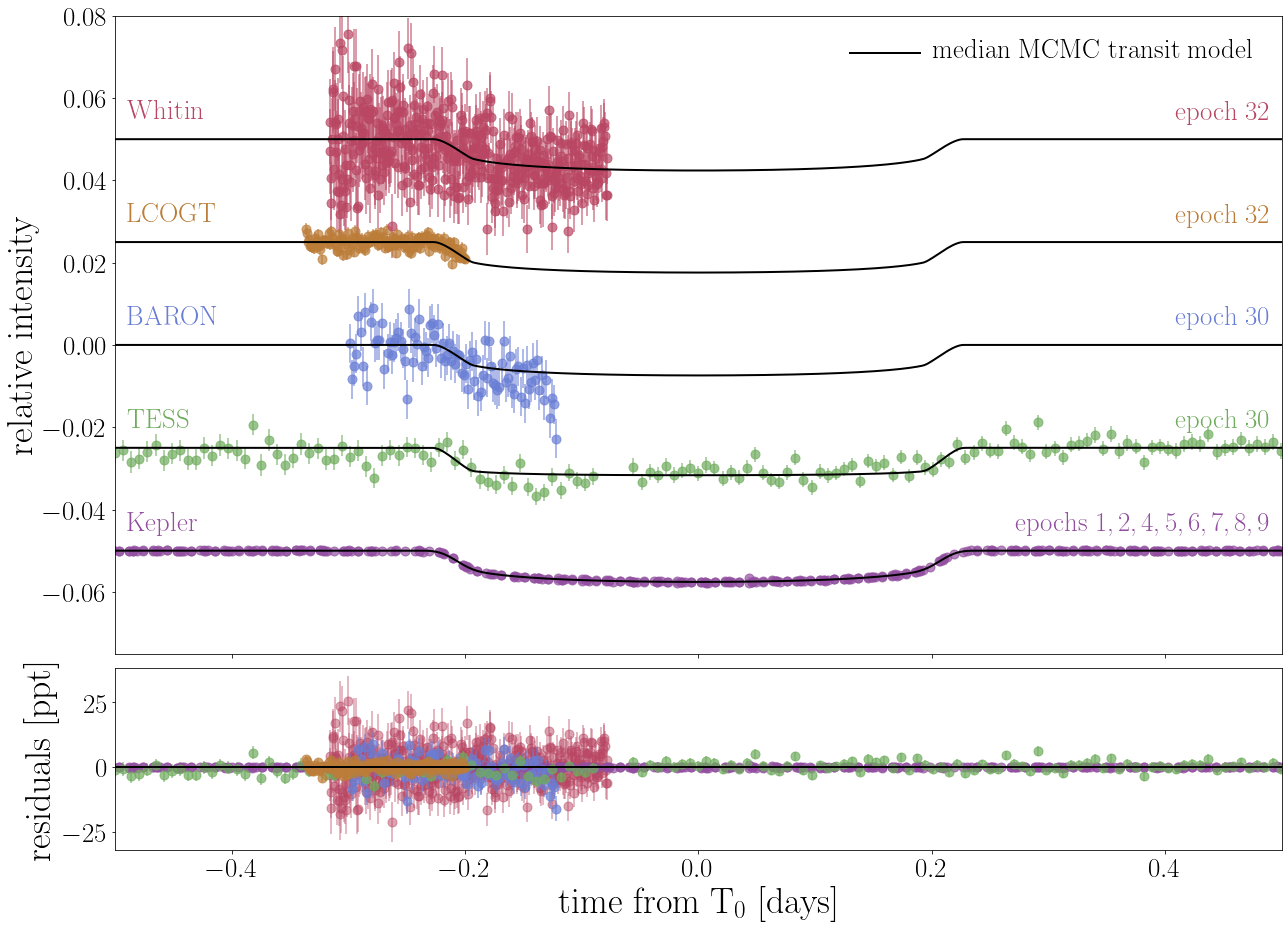

In [34]:
import matplotlib
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

dt = np.linspace(-.5, .5, 500)


#colors = ["#2E2252", "#ab0048", "#723c87", '#2E5090', '#5164ff']
#colors = ["#b30000", "#4421af", "#7c1158", "#1a53ff", "#0d88e6"]
colors = ["#9350a1", "#697ed5", "#6fac5d", "#bc7d39", "#b94663"]
fig, ax = plt.subplots(2, figsize = [18,13], gridspec_kw={'height_ratios': [7, 2]}, sharex=True)

index = 0

shifts = [-0.05, 0., -0.025, 0.025, 0.05]
#trans_inds = [0,1,3,4,5,6,7,8,29,31]
epochs_labels = ['epochs 1,\,2,\,4,\,5,\,6,\,7,\,8,\,9', 
                 'epoch 30', 'epoch 30', 'epoch 32', 'epoch 32']
with model:
    
    
    for n, (name, (x, y, yerr, texp)) in enumerate(datasets.items()):
        phase_curve = pmx.eval_in_model(
                lc_models[name](tts_median[0] + dt), map_soln)
        
        phase_curve_for_resid = pmx.eval_in_model(
                lc_models[name](x), map_soln)
        
        t_warp = pmx.eval_in_model(orbit._warp_times(x), map_soln)
        
        
        #jitter = map_soln[name+'_jitter']
        #error = np.sqrt(yerr**2.+jitter**2.)
        
        if name == 'TESS':
                y = (y+1)/TESS_blend_median - 1

        # Get the median period for plotting purposes
        p = period_median

        # Plot the folded data
        x_fold = (t_warp + 0.5 * p) % p - 0.5 * p
        ax[0].errorbar(
            x_fold, y+shifts[index], yerr=yerr, ms=9,
            marker='o', ls='', color=colors[index], zorder=-1000, alpha=0.7
        )


        ax[0].text(-0.49, shifts[index]+.005, name, fontsize = 27, color=colors[index])
        ax[0].text(0.49, shifts[index]+.005, epochs_labels[index], 
                 fontsize = 27, color=colors[index], horizontalalignment= 'right')




        ax[0].plot(dt, phase_curve+shifts[index], color='k', lw=2)
        
        
        
        if name == 'Whitin':
            ax[1].errorbar(
                x_fold, (y-phase_curve_for_resid)*1000, yerr=yerr*1000., ms=9,
                marker='o', ls='', color=colors[index], zorder=-5000, alpha=0.5
            )
        else:
            ax[1].errorbar(
                x_fold, (y-phase_curve_for_resid)*1000, yerr=yerr*1000., ms=9,
                marker='o', ls='', color=colors[index], zorder=-1000, alpha=0.7
            )

        ax[1].axhline(0, 0, 1, color='k', lw=2)

        index+=1
    
    
ax[0].axhline(0.071, 0.63, 0.69, color = 'k', lw=2)   
ax[0].text(0.475, 0.07, 'median MCMC transit model', fontsize = 27, color='k', horizontalalignment= 'right')
ax[0].set_xlim(-0.5, 0.5)
ax[0].set_ylim(-0.075, 0.08)
ax[0].set_ylabel("relative intensity", fontsize = 36)


#handles, labels = fig.gca().get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#ax[0].legend(by_label.values(), by_label.keys(), fontsize=23, loc=1)





ax[1].set_xlim(-0.5, 0.5)

ax[1].set_ylabel("residuals [ppt]", fontsize = 36)
ax[1].set_xlabel(r"time from $\textrm{T}_0$ [days]", fontsize = 36)


fig.tight_layout()
fig.savefig('transit_model.pdf')
    

plt.show()